## 目的

通过岗位招聘数据(work_analyse.xlsx), 完成包括数据清洗,分析, 绘图的操作



In [1]:
# 载入数据相应工具, 统一设置
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# 过滤警告
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft Yahei', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

C:\Users\wj\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [14]:
# 加载数据并对数据做备份, 保存原始数据

data_or = pd.read_excel('work_analyse.xlsx') # 读取数据
data_or_cy = data_or.copy() # 把源数据副本传给data_or_cy，目的是保护源数据。
data_or_cy.head(3)

,岗位类别,岗位id,城市,公司全名,福利待遇,工作地点,学历要求,工作类型,发布时间,职位名称,薪资,起薪,最高薪资,平均薪资,工作年限,岗位描述
0,java,7720312,上海,上海智龙企业管理有限公司,五险一金带薪年假午餐补助定期体检,长宁区,本科,开发|测试|运维类,17:32发布,java高级开发工程师,25k-35k,25000,35000.0,30000,5-10年,岗位描述：\n1.负责应用规划及设计，能够给完整的应用实施解决方案，包括：系统架构设计、交互...
1,java,4155796,北京,北京拉勾网络技术有限公司,五险一金弹性工作带薪年假免费两餐,海淀区,本科,开发|测试|运维类,19:19发布,Java高级开发工程师,20k-40k,20000,40000.0,30000,5-10年,岗位职责：\n偏架构方向，招聘后端基础服务的重构与设计，新技术方向的调研与实现。\n能力要求...
2,java,7679626,深圳,东莞市腾盛软件科技有限公司,绩效奖金定期体检带薪年假弹性工作,宝安区,本科,开发|测试|运维类,19:07发布,java开发工程师,15k-30k,15000,30000.0,22500,1-3年,岗位职责：\n1、负责支付/保险经纪/小额贷款/融资担保/众包平台等系统的业务需求梳理与功能...


# 分析目标一：各工作类别岗位数量及其最高和最低平均工资

### 从狭义的角度理解并分析数据科学

1. 生成包含相应列的DataFrame, 名称为data_info1, 包括"岗位数量占比", "岗位最低平均工资", "岗位最高平均工资"
2. 利用相应操作, 完成数据统计并填写相应的data_info1

In [15]:
df1 = data_or_cy.groupby('岗位类别')['岗位类别'].count()/data_or_cy.shape[0]
df2 = data_or_cy.groupby('岗位类别')['起薪','最高薪资'].mean()
data_info1 = pd.merge(df1,df2,how='left',left_index=True,right_index=True)
data_info1 = data_info1.rename(columns={'岗位类别':'岗位数量占比','起薪':'岗位最低平均工资','最高薪资':'岗位最高平均工资'}).reset_index()
#展示出data_info1的内容
round(data_info1,2)

,岗位类别,岗位数量占比,岗位最低平均工资,岗位最高平均工资
0,java,0.06,15527.78,26047.98
1,python,0.07,13917.78,23895.56
2,产品助理,0.07,5920.09,9401.83
3,人事,0.07,8594.59,14521.44
4,会计,0.07,6600.45,10191.96
5,商业数据分析,0.06,19517.56,34215.46
6,市场营销,0.06,8972.03,15972.03
7,数据产品经理,0.07,18696.43,32527.96
8,数据分析师,0.07,13875.28,23804.01
9,数据科学,0.01,24614.46,44277.11


In [16]:
#df1 = pd.DataFrame(data_or_cy.groupby('岗位类别')['岗位类别'].count()/data_or_cy.shape[0])
#df1 = df1.rename(columns={'岗位类别':'岗位数量占比'}).reset_index()
#
#df2 = pd.DataFrame(data_or_cy.groupby('岗位类别')['起薪','最高薪资'].mean())
#df2 = df2.rename(columns={'起薪':'岗位最低平均工资','最高薪资':'岗位最高平均工资'}).reset_index()
#
#data_info1 = pd.merge(df1,df2,how='left',left_index=True,right_index=True)
#data_info1 = data_info1.drop(['岗位类别_y'],axis=1).rename(columns={'岗位类别_x':'岗位类别'})
#展示出data_info1的内容
#data_info1
#横批————多此一举

### 将data_info1内容课时话, 分别利用饼图展示出占比,条图展示出数量

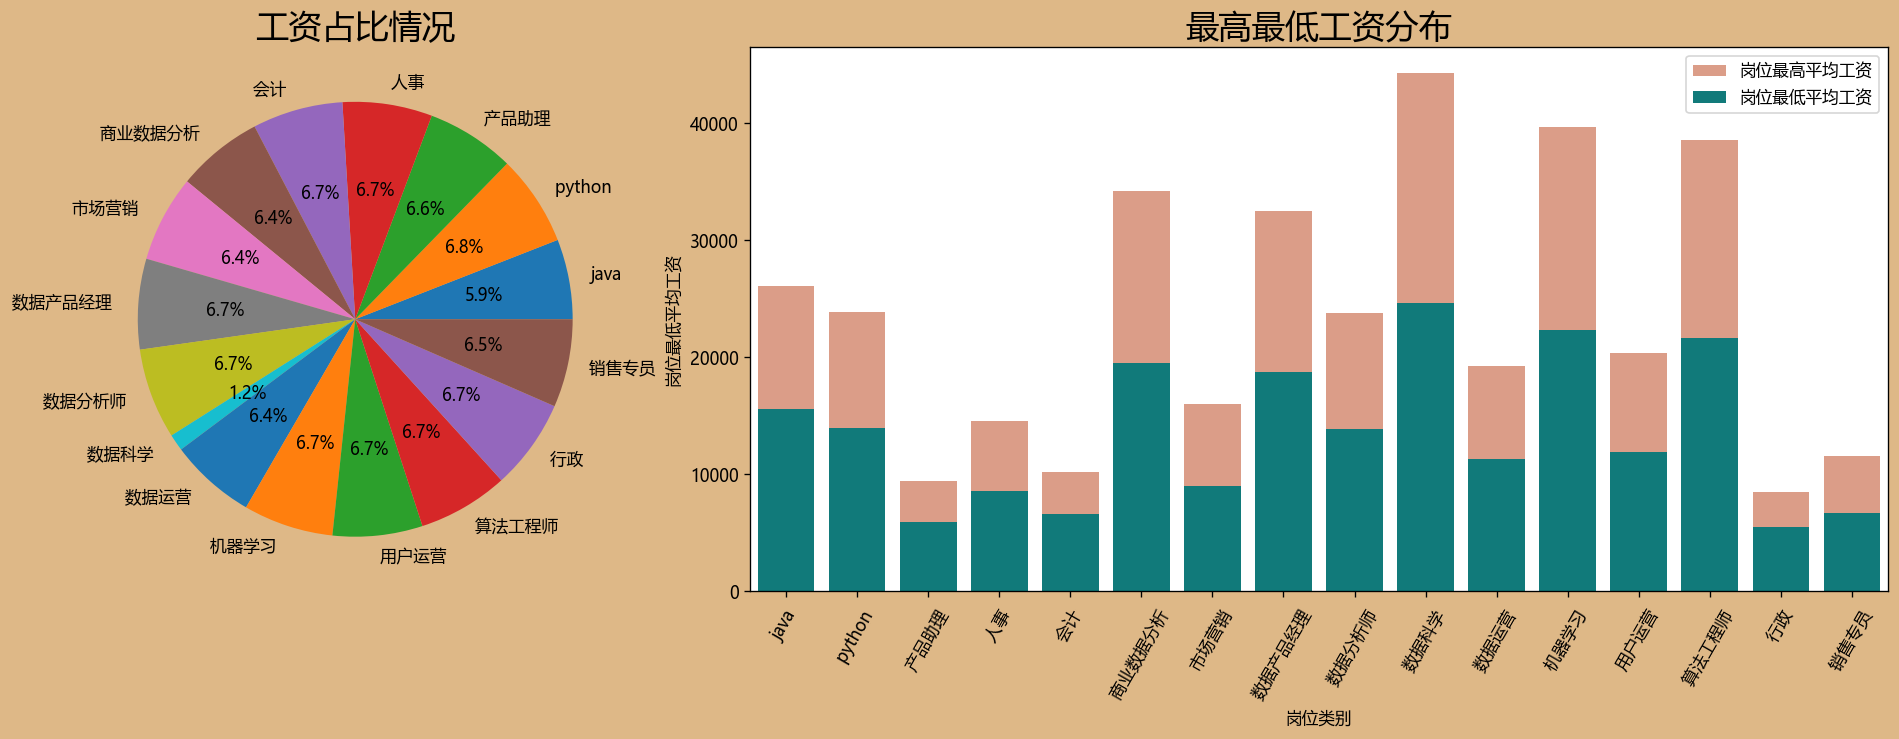

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['Microsoft Yahei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负

fig = plt.figure(dpi=120, figsize=(20, 6), facecolor='#DEB887') # 构建画布
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.39, hspace=0.2) # 把画布分割四宫格

# 画相应饼图
ax1 = plt.subplot(gs[:, 0:3], alpha=0.1) # 合并左边上下两个宫格生成pic_1画框
#colors = plt.get_cmap('Blues')(np.linspace(0.5, 1))
ax1.pie(data_info1['岗位数量占比'],
       # colors=colors,
        labels=data_info1['岗位类别'],
        autopct='%1.1f%%'
        )
ax1.set_title('工资占比情况',fontsize=20)

# 画条形图
ax2 = fig.add_subplot(gs[:,3:], alpha=0.1)
x = data_info1['岗位类别']
y = data_info1['岗位最低平均工资']
y1 = data_info1['岗位最高平均工资']
sns.barplot(x,y1,color='#E9967A',dodge=False,label='岗位最高平均工资')
sns.barplot(x,y,color='#008B8B',dodge=False,label='岗位最低平均工资')
ax2.set_title('最高最低工资分布',fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=60)
ax2.legend();

### 合并数据科学岗位

然而我们上面的数据运营、机器学习、数据科学、数据分析师、数据产品经理、商业数据分析其实都完全属于数据科学,
我们尝试把上面几类岗位合并成一类完成

找到岗位中是上面几类的岗位名称用"数据分析"代替

In [18]:
#list = ['数据运营','机器学习','数据分析师','数据产品经理','商业数据分析','数据科学','算法工程师']
#data_or_cy['岗位类别'] = data_or_cy['岗位类别'].str.strip().replace(list,'数据分析')
#data_or_cy['岗位类别'].unique()

In [19]:
#data_or_cy['岗位类别'] = data_or_cy['岗位类别'].str.strip()
#list = ['数据运营','机器学习','数据分析师','数据产品经理','商业数据分析','数据科学','算法工程师']
#for i in list:
#    data_or_cy[data_or_cy['岗位类别']==i] = '数据分析'
#data_or_cy['岗位类别'].unique()

In [24]:
data_or_cy['岗位类别'] = data_or_cy['岗位类别'].str.strip()
list = ['数据运营','机器学习','数据分析师','数据产品经理','商业数据分析','数据科学','算法工程师']
data_or_cy['岗位类别'] = data_or_cy['岗位类别'].replace({ k :'数据分析' for k in list})
data_or_cy['岗位类别'].unique()

array(['java', 'python', '产品助理', '人事', '会计', '数据分析', '市场营销', '用户运营', '行政',
       '销售专员'], dtype=object)

### 替换完成后重新计算岗位数量占比和最低工资,最高工资

In [25]:
df1 = data_or_cy.groupby('岗位类别')['岗位类别'].count()/data_or_cy.shape[0]
df2 = data_or_cy.groupby('岗位类别')['起薪','最高薪资'].mean()
data_info2 = pd.merge(df1,df2,how='left',left_index=True,right_index=True)
data_info2 = data_info2.rename(columns={'岗位类别':'岗位数量占比','起薪':'岗位最低平均工资','最高薪资':'岗位最高平均工资'}).reset_index()
#展示出data_info1的内容
data_info2=round(data_info2,2)
# 展示替换出的内容
data_info2 # 分析结果数据展示

,岗位类别,岗位数量占比,岗位最低平均工资,岗位最高平均工资
0,java,0.06,15527.78,26047.98
1,python,0.07,13917.78,23895.56
2,产品助理,0.07,5920.09,9401.83
3,人事,0.07,8594.59,14521.44
4,会计,0.07,6600.45,10191.96
5,市场营销,0.06,8972.03,15972.03
6,数据分析,0.41,18132.70,31790.61
7,用户运营,0.07,11880.90,20370.79
8,行政,0.07,5446.43,8473.21
9,销售专员,0.07,6676.61,11559.63


### 重新展示合并后的岗位情况

利用合并后的岗位数据展示岗位占比

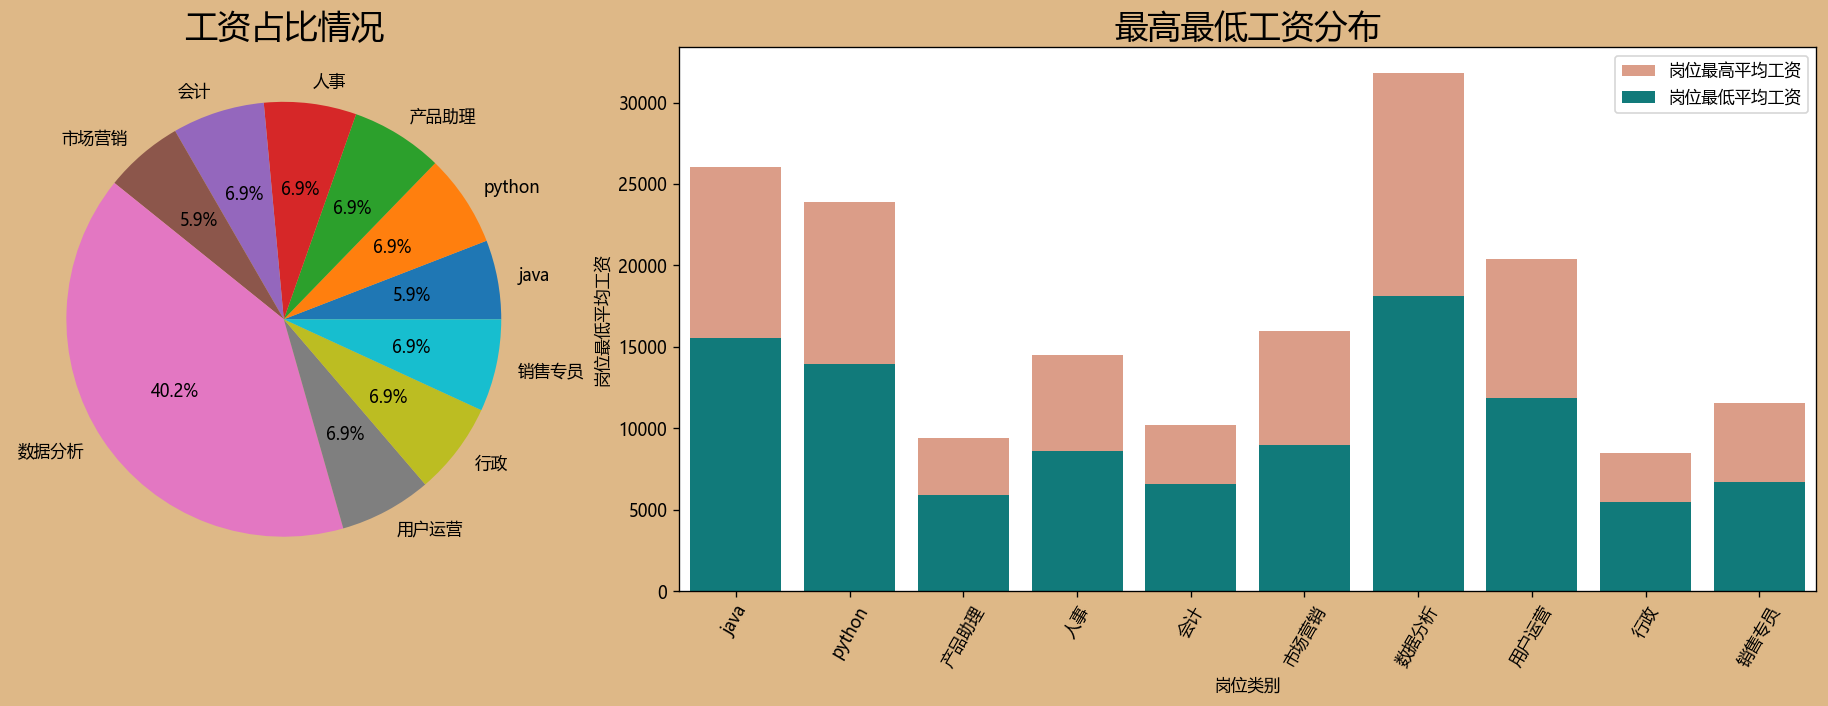

In [26]:
fig = plt.figure(dpi=120, figsize=(20, 6), facecolor='#DEB887') # 构建画布
gs = gridspec.GridSpec(nrows=1, ncols=8, wspace=0.39, hspace=0.2) # 把画布分割四宫格

# 画相应饼图
ax1 = plt.subplot(gs[:, 0:3], alpha=0.1) #  合并左边上下两个宫格生成pic_1画框
#colors = plt.get_cmap('Blues')(np.linspace(0.5, 1))
ax1.pie(data_info2['岗位数量占比'],
       # colors=colors,
        labels=data_info2['岗位类别'],
        autopct='%1.1f%%'
        )
ax1.set_title('工资占比情况',fontsize=20)

# 画条形图
ax2 = fig.add_subplot(gs[:,3:], alpha=0.1)
x = data_info2['岗位类别']
y = data_info2['岗位最低平均工资']
y1 = data_info2['岗位最高平均工资']
sns.barplot(x,y1,color='#E9967A',dodge=False,label='岗位最高平均工资')
sns.barplot(x,y,color='#008B8B',dodge=False,label='岗位最低平均工资')
ax2.set_title('最高最低工资分布',fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=60)
ax2.legend();